In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random
from tqdm import tqdm
import cv2
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Read Data

***Sebelum ngebaca data, add shortcut dulu folder Pengolahan Citra Digital ke drive mas-mas yak***

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Pengolahan Citra Digital/

[Errno 2] No such file or directory: '/content/drive/My Drive/Pengolahan Citra Digital/'
/content


In [ ]:
#punya yang selain abdul (yang pake shortcut)
#data_dir = "/content/drive/My Drive/Pengolahan Citra Digital/DatasetNeckbandB"
#punya abdul
data_dir = "/content/drive/My Drive/ILKOM/Semester 6/Tugas Akhir/Pengolahan Citra Digital/DatasetNeckbandB"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.bmp')))
print(image_count)

1948


In [ ]:
all_images = []
hog_images = []
hog_features = []
labels = []

# Fungsi Augmentasi

In [ ]:
import random
from skimage.transform import rotate
import imgaug.augmenters as iaa
import imgaug as ia
import albumentations as A
random.seed(1)
def augmentations(img):
  dimg = []
  dimg.append(img)
  #rotation,
  r_img = rotate(img, angle=random.randint(-180,180))*255
  dimg.append(r_img)
  #scaling,
  s_img = iaa.Affine(scale={"x": (random.randint(1,3),random.randint(1,3)), 
                            "y": (random.randint(1,3),random.randint(1,3))})
  s_img = s_img.augment_image(img)
  dimg.append(s_img)
  #brightness,
  tr = A.Compose([
                  A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0)
  ])
  b_img = tr(image=img)['image']
  dimg.append(b_img)
  #flip,
  fh_img = np.flipud(img)
  fv_img = np.fliplr(img)
  dimg.append(fh_img)
  dimg.append(fv_img)
  #translate,
  h, w = img.shape[:2]
  nh, nw = h/random.randint(1,h/2), w/random.randint(1,w/2)
  matrix = np.float32([[1,0,nw],
                      [0,1,nh]])
  t_img = cv2.warpAffine(img, matrix, (w,h))
  dimg.append(t_img)
  #shearing
  shr_img = iaa.Affine(shear= (random.randint(-45,45),random.randint(-45,45)))
  shr_img = shr_img.augment_image(img)
  dimg.append(shr_img)
  return dimg

# Persiapan dataset

In [ ]:
class1 = list(data_dir.glob('class1/*'))
for it in tqdm(range(0,len(class1))):
    cls = 'class1'
    img = cv2.imread(str(class1[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class2 = list(data_dir.glob('class2/*'))
for it in tqdm(range(0,len(class2))):
    cls = 'class2'
    img = cv2.imread(str(class2[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class3 = list(data_dir.glob('class3/*'))
for it in tqdm(range(0,len(class3))):
    cls = 'class3'
    img = cv2.imread(str(class3[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class4 = list(data_dir.glob('class4/*'))
for it in tqdm(range(0,len(class4))):
    cls = 'class4'
    img = cv2.imread(str(class4[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class5 = list(data_dir.glob('class5/*'))
for it in tqdm(range(0,len(class5))):
    cls = 'class5'
    img = cv2.imread(str(class5[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class6 = list(data_dir.glob('class6/*'))
for it in tqdm(range(0,len(class6))):
    cls = 'class6'
    img = cv2.imread(str(class6[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class7 = list(data_dir.glob('class7/*'))
for it in tqdm(range(0,len(class7))):
    cls = 'class7'
    img = cv2.imread(str(class7[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

class8 = list(data_dir.glob('class8/*'))
for it in tqdm(range(0,len(class8))):
    cls = 'class8'
    img = cv2.imread(str(class8[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

unidentified = list(data_dir.glob('class9/*'))
for it in tqdm(range(0,len(unidentified))):
    cls = 'unidentified'
    img = cv2.imread(str(unidentified[it]))
    resized_img = resize(img, (48*1, 64*1))
    all_images.append(resized_img)
    labels.append(cls)

100%|██████████| 320/320 [02:34<00:00,  2.07it/s]


In [ ]:
all_images = np.array(all_images)
len(all_images)
type(all_images)
all_images.shape
len(labels)

1948

## Pembagian data latih dan uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_images,labels,test_size=0.3,stratify=labels)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,len(y_test)))

Training data and target sizes: 
(1363, 48, 64, 3), 1363
Test data and target sizes: 
(585, 48, 64, 3), 585


## Augmentasi data latih dan fitur extraction

In [ ]:
temp_y_train = y_train
temp_x_train = X_train
y_train = []
X_train = []
for it in tqdm(range(0,len(temp_x_train))):
    cls = temp_y_train[it]
    img = temp_x_train[it]
    augmen_img = augmentations(img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          X_train.append(fd)
      y_train.append(cls)

temp_x_test = X_test
X_test = []
for it in tqdm(range(0,len(temp_x_test))):
    img = temp_x_test[it]
    resized_img = resize(img, (48*1, 64*1))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2), visualize=True, multichannel=True)
    if hog_image is not None:
        hog_images.append(hog_image)
        X_test.append(fd)

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)

print('Training data and target sizes: \n{}, {}'.format(X_train.shape,len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,len(y_test)))

100%|██████████| 585/585 [00:11<00:00, 50.81it/s]


Training data and target sizes: 
(10904, 1260), 10904
Test data and target sizes: 
(585, 1260), 585


## Deprecated

In [ ]:
#with augmentations
class1 = list(data_dir.glob('class1/*'))
print(len(class1))
#PIL.Image.open(str(class1[0]))
for it in tqdm(range(0,len(class1))):
    cls = 'class1'
    img = cv2.imread(str(class1[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class2 = list(data_dir.glob('class2/*'))
for it in tqdm(range(0,len(class2))):
    cls = 'class2'
    img = cv2.imread(str(class2[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class3 = list(data_dir.glob('class3/*'))
for it in tqdm(range(0,len(class3))):
    cls = 'class3'
    img = cv2.imread(str(class3[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class4 = list(data_dir.glob('class4/*'))
for it in tqdm(range(0,len(class4))):
    cls = 'class4'
    img = cv2.imread(str(class4[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class5 = list(data_dir.glob('class5/*'))
for it in tqdm(range(0,len(class5))):
    cls = 'class5'
    img = cv2.imread(str(class5[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class6 = list(data_dir.glob('class6/*'))
for it in tqdm(range(0,len(class6))):
    cls = 'class6'
    img = cv2.imread(str(class6[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class7 = list(data_dir.glob('class7/*'))
for it in tqdm(range(0,len(class7))):
    cls = 'class7'
    img = cv2.imread(str(class7[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

class8 = list(data_dir.glob('class8/*'))
for it in tqdm(range(0,len(class8))):
    cls = 'class8'
    img = cv2.imread(str(class8[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)

unidentified = list(data_dir.glob('unidentified/*'))
for it in tqdm(range(0,len(unidentified))):
    cls = 'unidentified'
    img = cv2.imread(str(unidentified[it]))
    resized_img = resize(img, (48*1, 64*1))
    augmen_img = augmentations(resized_img)
    for im in augmen_img:
      fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
      if hog_image is not None:
          hog_images.append(hog_image)
          hog_features.append(fd)
      labels.append(cls)


hog_features = np.array(hog_features)
len(hog_images)

262


100%|██████████| 169/169 [01:31<00:00,  1.84it/s]
0it [00:00, ?it/s]


24513

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00463872 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00499951 0.        ]
 ...
 [0.         0.03897585 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00856846 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(13024, 1260)

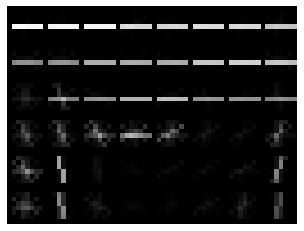

In [ ]:
print(hog_images[0])
plt.axis("off")
plt.imshow(hog_images[0], cmap="gray")
hog_features.shape

In [ ]:
print(len(hog_features), len(hog_images),len(labels))

13024 24513 14972


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2,stratify=labels)

print('Training data and target sizes: \n{}, {}'.format(X_train.shape,len(y_train)))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,len(y_test)))

ValueError: ignored

In [ ]:
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
#classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier = RandomForestClassifier()
classifier.fit(X_scaled, y_train)
preds = classifier.predict(scaler.transform(X_test))
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))

test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print(test_accuracy)

[[79  0  0  0  5  1  0  2  0]
 [ 0 62  1  1  4  5  0  4  2]
 [ 0  0 77  0  2  0  0  3  1]
 [ 0  0  0 49  1  0  0  0  0]
 [ 0  0  0  0 32  0  3  1  0]
 [ 0  0  1  0  0 46  0  0  0]
 [ 0  0  0  1  0  1 50  0  0]
 [ 0  0  0  0  1  5  2 39  1]
 [ 0  1  0  4  0  1  3  2 92]]
0.8991452991452992
0.8991452991452992


In [ ]:
# Random Forest Classifier
print('> Random Forest Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
rf_clf = RandomForestClassifier(random_state = 1)
rf_clf.fit(X_scaled, y_train)
rf_preds = rf_clf.predict(scaler.transform(X_test))
print(confusion_matrix(rf_preds, y_test))
print(accuracy_score(rf_preds, y_test))

# Logistic Regression
print()
print('> Logistic Regression Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
lr_clf = LogisticRegression(random_state = 1)
lr_clf.fit(X_scaled, y_train)
lr_preds = lr_clf.predict(scaler.transform(X_test))
print(confusion_matrix(lr_preds, y_test))
print(accuracy_score(lr_preds, y_test))

# Decision Tree
print()
print('> Decision Tree Classifier')
random.seed(1)
test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_scaled, y_train)
dt_preds = dt_clf.predict(scaler.transform(X_test))
print(confusion_matrix(dt_preds, y_test))
print(accuracy_score(dt_preds, y_test))

> Random Forest Classifier
[[79  0  0  1  2  0  6  3  0]
 [ 0 62  1  0  6  4  0  5  3]
 [ 0  0 77  0  1  1  0  0  3]
 [ 0  0  0 49  2  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0]
 [ 0  0  1  0  0 49  0  0  0]
 [ 0  0  0  0  0  2 49  0  0]
 [ 0  0  0  0  1  2  0 41  1]
 [ 0  1  0  5  0  1  3  2 89]]
0.9025641025641026

> Logistic Regression Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[76  0  0  1  0  0  1  2  0]
 [ 0 54  1  0  1  0  1  1  9]
 [ 0  1 73  1  1  5  1  0  1]
 [ 2  1  1 47  0  0  1  1  1]
 [ 1  0  0  1 39  0  3  3  1]
 [ 0  2  2  1  1 50  0  1  2]
 [ 0  1  0  1  3  3 46  0  1]
 [ 0  1  1  1  0  1  1 40  1]
 [ 0  3  1  2  0  0  4  3 80]]
0.8632478632478633

> Decision Tree Classifier
[[65  0  1  1  2  4  2  5  1]
 [ 0 52  3  1  2  7  1  2  5]
 [ 1  5 71  1  2 10  1  1  8]
 [ 5  1  1 41  2  1  4  1  3]
 [ 2  0  0  2 29  1  7  7  2]
 [ 0  1  1  0  1 32  2  5  3]
 [ 3  3  0  4  3  1 38  4  1]
 [ 1  0  2  1  3  1  1 22  6]
 [ 2  1  0  4  1  2  2  4 67]]
0.7128205128205128


(48, 64)
1260


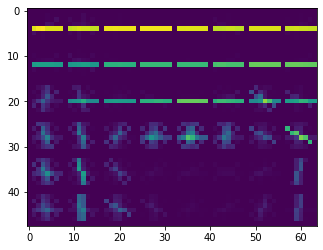

In [ ]:
PIL.Image.open(str(class1[0]))
img = cv2.imread(str(class1[0]))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.imshow(hog_image)
print(hog_image.shape)
print(len(fd))